<a href="https://colab.research.google.com/github/Ladouce07/Data-Science/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Course: Data Science for Decision Support**

**Author:** July Ladouce Nuessi, Lastname: NKADJI

**Co-author:** Achille, Monthe Djeuthie


---




# Problem: **Regression** (Total score 34)

# **`„Data Pre-processing“`**

1)	Read the data from your individual variant into Python notebook

In [ ]:
#Write your code here
import pandas as pd

df=pd.read_csv("/content/Fish.csv")
df


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


5) Look at the independent and dependent variables. Divide the dataset accordingly into matrices X and Y. Output the shapes of these matrices.

In [ ]:
#Write your code here
Y = df['Weight']
X = df.drop(['Weight'],axis=1)

print(X.shape);
print(Y.shape);

(159, 6)
(159,)


*Comment the results of the previous program*

6) Look at data types of the variables. Are there any categorical variable you need to encode? Execute necessary transformations. Drop some columns if necessary, when recommended in your individual variant.

In [ ]:
from pandas.core.arrays import categorical
from sklearn.preprocessing import LabelEncoder
categorical = ['Species']
le = LabelEncoder()
for i in categorical:
  le.fit(df[i])
  df[i]=le.transform(df[i])

In [ ]:
#Write your code here
Y = df['Weight']
X = df.drop(['Weight'],axis=1)

print(X.shape);
print(Y.shape);

(159, 6)
(159,)


# **`Task 1 “Data Analysis” (20 Scores)`**

Compare 4 ML methods:

*   Random Forest regression
*   XG Boost regression
*   CatBoost regression
*   Light GBM regression


1) Scale your whole dataset with Standard Scaler.

In [ ]:
#Scaling with standard scaler.
from sklearn.preprocessing import StandardScaler
sc_standard = StandardScaler().fit(X)
XS_scaler = sc_standard.transform(X)

2) Divide your dataset into 2 parts: training set and testing set (80:20). Use defined random_state to reproduce the splitting for other Scaler. Output the dimension of the resulting datasets.

In [ ]:
#Training set and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XS_scaler, Y, test_size = 0.20, random_state=0)

print("dimension of x_train", x_train.shape)
print("dimension of y_train", y_train.shape)
print("dimension of x_test", x_test.shape)
print("dimension of y_test", y_test.shape)

dimension of x_train (127, 6)
dimension of y_train (127,)
dimension of x_test (32, 6)
dimension of y_test (32,)


3) **Preliminary analysis:** Build 4 models based on 4 mentioned ML methods. For each model: train with training set and output the regression score (R2), MSE, RMSE, MAE of the model using training set. Now test your model with a testset and output the regression score (R2) and other metrics. Compare the metrics obtained with training and testset. Find optimal parameters with GridSearchCV() function for each of the models for the whole dataset. Output the coefficients of the linear regression model. Which variables have the biggest influence on the output (dependent variables)? Write the conclusions in the notebook as a text field.

**Random Forest**

In [ ]:

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor()

# fit the regressor with x_train and y_train data
regressor.fit(x_train, y_train)

#predict the result

#prediction for training set
predict_train=regressor.predict(x_train)
#prediction for testing set
predict_test=regressor.predict(x_test)

#Regression score and other metrics for training set
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2
import numpy as np

R2_score_train_random=R2(y_train, predict_train)
MSE_train_random=MSE(y_train, predict_train)
MAE_train_random=MAE(y_train, predict_train)
RMSE_train_random=np.sqrt(MSE_train_random)

#Output
print("The regression score for the training set is", R2_score_train_random)
print("The mean squared error for the training set is", MSE_train_random)
print("The mean absolute error for the training set is", MAE_train_random)
print("The root mean absolute error for the training set is", RMSE_train_random)

#Test the model
R2_score_test_random=R2(y_test, predict_test)
MSE_test_random=MSE(y_test, predict_test)
MAE_test_random=MAE(y_test, predict_test)
RMSE_test_random=np.sqrt(MSE_test_random)

#Output
print("The regression score for the testing set is", R2_score_test_random)
print("The mean squared error for the testing set is", MSE_test_random)
print("The mean absolute error for the testing set is", MAE_test_random)
print("The root mean absolute error for the testing set is", RMSE_test_random)

#Compare the metrics
comparator={'Sets':['Training set', 'Testing set'], 'R2_SCORE':[R2_score_train_random,R2_score_test_random],
            'MSE':[MSE_train_random,MSE_test_random], 'MAE':[MAE_train_random,MAE_test_random],
            'RMSE':[RMSE_train_random,RMSE_test_random]}
comparing=pd.DataFrame(comparator)
print("Metrics of the Random Forest Regressor")
print(comparing)

#Find optimal parameters
from sklearn.model_selection import GridSearchCV

#define the parameters
param_distributions={'bootstrap': [True, False],
                     'n_estimators': [25, 50, 100, 150],
                      'max_features': ['sqrt', 'log2', None],
                      'max_depth': [3, 6, 9],
                      'max_leaf_nodes': [3, 6, 9],}

#performe the gridsearchCV
grid_search_random = GridSearchCV(regressor,param_distributions)
grid_search_random.fit(x_train, y_train)

#print the best parameters
print("Best parameters",grid_search_random.best_params_)


The regression score for the training set is 0.9935598768031553
The mean squared error for the training set is 706.8708165275591
The mean absolute error for the training set is 14.978165354330708
The root mean absolute error for the training set is 26.58704226738204
The regression score for the testing set is 0.9595237028476582
The mean squared error for the testing set is 7704.689361468751
The mean absolute error for the testing set is 50.863968750000005
The root mean absolute error for the testing set is 87.77635992377874
Metrics of the Random Forest Regressor
           Sets  R2_SCORE          MSE        MAE       RMSE
0  Training set  0.993560   706.870817  14.978165  26.587042
1   Testing set  0.959524  7704.689361  50.863969  87.776360
Best parameters {'bootstrap': True, 'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 9, 'n_estimators': 100}


*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

For that model, we can see that the training set shows the better values than the testing set.

**XG Boost**

In [ ]:
# Fitting XG Boost Regression to the dataset
# import XG Boost
from xgboost import XGBRegressor
#print(xgboost.__version__)

#create the regressor object
XG_regressor= XGBRegressor()

# fit the regressor with x_train and y_train data
XG_regressor.fit(x_train, y_train)

#predict the result

#prediction for training set
predict_train_XG = XG_regressor.predict(x_train)
#prediction for testing set
predict_test_XG = XG_regressor.predict(x_test)

#Regression score and other metrics for training set

R2_score_train_XG = R2(y_train, predict_train_XG)
MSE_train_XG = MSE(y_train, predict_train_XG)
MAE_train_XG = MAE(y_train, predict_train_XG)
RMSE_train_XG = np.sqrt(MSE_train_XG)

#Output
print("The regression score for the training set is", R2_score_train_XG)
print("The mean squared error for the training set is", MSE_train_XG)
print("The mean absolute error for the training set is", MAE_train_XG)
print("The root mean absolute error for the training set is", RMSE_train_XG)

#Test the model
R2_score_test_XG = R2(y_test, predict_test_XG)
MSE_test_XG = MSE(y_test, predict_test_XG)
MAE_test_XG = MAE(y_test, predict_test_XG)
RMSE_test_XG = np.sqrt(MSE_test_XG)

#Output
print("The regression score for the testing set is", R2_score_test_XG)
print("The mean squared error for the testing set is", MSE_test_XG)
print("The mean absolute error for the testing set is", MAE_test_XG)
print("The root mean absolute error for the testing set is", RMSE_test_XG)

#Compare the metrics
comparator_XG={'Sets':['Training set', 'Testing set'], 'R2_SCORE':[R2_score_train_XG,R2_score_test_XG],
            'MSE':[MSE_train_XG,MSE_test_XG], 'MAE':[MAE_train_XG,MAE_test_XG],
            'RMSE':[RMSE_train_XG,RMSE_test_XG]}
comparing_XG=pd.DataFrame(comparator_XG)
print("Metrics of the XG Boost Regressor")
print(comparing_XG)

#Find optimal parameters
from sklearn.model_selection import GridSearchCV

#define the parameters
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


#performe the gridsearchCV
grid_search_XG = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_XG.fit(x_train, y_train)

#print the best parameters
print("Best parameters",grid_search_XG.best_params_)





The regression score for the training set is 0.9999999083541886
The mean squared error for the training set is 0.010059085444135644
The mean absolute error for the training set is 0.06988362064511758
The root mean absolute error for the training set is 0.10029499211892708
The regression score for the testing set is 0.9804624130748313
The mean squared error for the testing set is 3718.9923170234856
The mean absolute error for the testing set is 41.17633447647095
The root mean absolute error for the testing set is 60.98354136177634
Metrics of the XG Boost Regressor
           Sets  R2_SCORE          MSE        MAE       RMSE
0  Training set  1.000000     0.010059   0.069884   0.100295
1   Testing set  0.980462  3718.992317  41.176334  60.983541
Best parameters {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.8}


Based on the R2 score on training and testing set, this model is very good for the our data set.

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**CatBoost**

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Fitting CB Boost Regression to the dataset
# import CB Boost
from catboost import CatBoostRegressor
#create the regressor object
CB_regressor= CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6)

# fit the regressor with x_train and y_train data
CB_regressor.fit(x_train, y_train)

#predict the result

#prediction for training set
predict_train_CB = CB_regressor.predict(x_train)
#prediction for testing set
predict_test_CB = CB_regressor.predict(x_test)

#Regression score and other metrics for training set

R2_score_train_CB = R2(y_train, predict_train_CB)
MSE_train_CB = MSE(y_train, predict_train_CB)
MAE_train_CB = MAE(y_train, predict_train_CB)
RMSE_train_CB = np.sqrt(MSE_train_CB)

#Output
print("The regression score for the training set is", R2_score_train_CB)
print("The mean squared error for the training set is", MSE_train_CB)
print("The mean absolute error for the training set is", MAE_train_CB)
print("The root mean absolute error for the training set is", RMSE_train_CB)

#Test the model
R2_score_test_CB = R2(y_test, predict_test_CB)
MSE_test_CB = MSE(y_test, predict_test_CB)
MAE_test_CB = MAE(y_test, predict_test_CB)
RMSE_test_CB = np.sqrt(MSE_test_CB)

#Output
print("The regression score for the testing set is", R2_score_test_CB)
print("The mean squared error for the testing set is", MSE_test_CB)
print("The mean absolute error for the testing set is", MAE_test_CB)
print("The root mean absolute error for the testing set is", RMSE_test_CB)

#Compare the metrics
comparator_CB={'Sets':['Training set', 'Testing set'], 'R2_SCORE':[R2_score_train_CB,R2_score_test_CB],
            'MSE':[MSE_train_CB,MSE_test_CB], 'MAE':[MAE_train_CB,MAE_test_CB],
            'RMSE':[RMSE_train_CB,RMSE_test_CB]}
comparing_CB=pd.DataFrame(comparator_CB)
print("Metrics of the CB Boost Regressor")
print(comparing_CB)

#Find optimal parameters
from sklearn.model_selection import GridSearchCV

#define the parameters
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 1],
    'iterations': [100, 200, 300]
}

#performe the gridsearchCV
grid_search_CB = GridSearchCV(CatBoostRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_CB.fit(x_train, y_train)

#print the best parameters
print("Best parameters",grid_search_CB.best_estimator_)
print("Best score",grid_search_CB.best_score_)



Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
2:	learn: 79.4664044	total: 3.94ms	remaining: 128ms
3:	learn: 60.2493685	total: 5.42ms	remaining: 130ms
4:	learn: 55.2396236	total: 7.08ms	remaining: 135ms
5:	learn: 45.7826343	total: 14.3ms	remaining: 223ms
6:	learn: 37.4197096	total: 24.6ms	remaining: 326ms
7:	learn: 32.0663921	total: 27.7ms	remaining: 319ms
8:	learn: 30.2476787	total: 28.8ms	remaining: 291ms
9:	learn: 28.9722750	total: 31.6ms	remaining: 284ms
10:	learn: 21.7307013	total: 33.3ms	remaining: 270ms
11:	learn: 18.3525768	total: 34.8ms	remaining: 256ms
12:	learn: 15.1603522	total: 51.6ms	remaining: 345ms
13:	learn: 13.6371797	total: 59.3ms	remaining: 364ms
14:	learn: 11.3086065	total: 70.4ms	remaining: 399ms
15:	learn: 9.8885667	total: 75.1ms	remaining: 394ms
16:	learn: 8.9575147	total: 81.5ms	remaining: 398ms
17:	learn: 8.1062699	total: 83.3ms	remaining: 379ms
18:	learn: 7.2087706	total: 84.8ms	remaining: 361ms
19:	learn: 6.5771110	total: 86.3m

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**Light GBM**

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Fitting Light GBM Regression to the dataset
# import Light GBM
import lightgbm as lgb
from lightgbm import LGBMRegressor
#create the regressor object
LB_regressor= LGBMRegressor()

# fit the regressor with x_train and y_train data
LB_regressor.fit(x_train, y_train)

#predict the result

#prediction for training set
predict_train_LB = LB_regressor.predict(x_train)
#prediction for testing set
predict_test_LB = LB_regressor.predict(x_test)

#Regression score and other metrics for training set

R2_score_train_LB = R2(y_train, predict_train_LB)
MSE_train_LB = MSE(y_train, predict_train_LB)
MAE_train_LB = MAE(y_train, predict_train_LB)
RMSE_train_LB = np.sqrt(MSE_train_LB)

#Output
print("The regression score for the training set is", R2_score_train_LB)
print("The mean squared error for the training set is", MSE_train_LB)
print("The mean absolute error for the training set is", MAE_train_LB)
print("The root mean absolute error for the training set is", RMSE_train_LB)

#Test the model
R2_score_test_LB = R2(y_test, predict_test_LB)
MSE_test_LB = MSE(y_test, predict_test_LB)
MAE_test_LB = MAE(y_test, predict_test_LB)
RMSE_test_LB = np.sqrt(MSE_test_LB)

#Output
print("The regression score for the testing set is", R2_score_test_LB)
print("The mean squared error for the testing set is", MSE_test_LB)
print("The mean absolute error for the testing set is", MAE_test_LB)
print("The root mean absolute error for the testing set is", RMSE_test_LB)

#Compare the metrics
comparator_LB={'Sets':['Training set', 'Testing set'], 'R2_SCORE':[R2_score_train_LB,R2_score_test_LB],
            'MSE':[MSE_train_LB,MSE_test_LB], 'MAE':[MAE_train_LB,MAE_test_LB],
            'RMSE':[RMSE_train_LB,RMSE_test_LB]}
comparing_LB=pd.DataFrame(comparator_LB)
print("Metrics of the Light GBM Regressor")
print(comparing_LB)

#Find optimal parameters
from sklearn.model_selection import GridSearchCV

#define the parameters
param_grid = {
                  'learning_rate': [0.01], 'n_estimators': [8, 24],
                   'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'],
                   'objective': ['binary'], 'seed': [500],
                   'colsample_bytree': [0.65, 0.75, 0.8],
                   'subsample': [0.7, 0.75], 'reg_alpha': [1, 2, 6],
                   'reg_lambda': [1, 2, 6]
}

#performe the gridsearchCV
grid_search_LB = GridSearchCV(LB_regressor, param_grid, verbose=1, cv=5, n_jobs=-1)
grid_search_LB.fit(x_train, y_train)

#print the best parameters
print("Best parameters",grid_search_LB.best_estimator_)


*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*



 Output the results: (1) create a dataframe with 8 columns, which correspond to each of the metrics for the training set and testset and rows correspond to each model. (2) create a dataframe with 5 columns, which correspond to "real values" and predicted values by each model on the testset and rows correspond to the observations from the testset.

In [ ]:
#Dataframe of metrics for training and testing set of each model
result_m={'Differents models':['Random Forest','XG Boost','CatBoost','Light GBM'], 'R2_Training':[R2_score_train_random,R2_score_train_XG,R2_score_train_CB,R2_score_train_LB],
          'R2_Testing':[R2_score_test_random,R2_score_test_XG,R2_score_test_CB,R2_score_test_LB],'MSE_Training':[MSE_train_random,MSE_train_XG,MSE_train_CB,MSE_train_LB],'MSE_Testing':[MSE_test_random,MSE_test_XG,MSE_test_CB,MSE_test_LB],
          'MAE_Training':[MAE_train_random,MAE_train_XG,MAE_train_CB,MAE_train_LB],'MAE_Testing':[MAE_test_random,MAE_test_XG,MAE_test_CB,MAE_test_LB],
          'RMSE_Training':[RMSE_train_random,RMSE_train_XG,RMSE_train_CB,RMSE_train_LB],'RMSE_Testing':[RMSE_test_random,RMSE_test_XG,RMSE_test_CB,RMSE_test_LB]}
result_metrics=pd.DataFrame(result_m)

result_metrics




,Differents models,R2_Training,R2_Testing,MSE_Training,MSE_Testing,MAE_Training,MAE_Testing,RMSE_Training,RMSE_Testing
0,Random Forest,0.998808,0.981563,1.308152e+02,3509.499550,3.991480,21.157938,11.437447,59.241029
1,XG Boost,1.000000,0.997447,3.764148e-07,485.944612,0.000480,12.994565,0.000614,22.044151
2,CatBoost,0.995630,0.969935,4.796161e+02,5722.980112,15.378947,43.829820,21.900138,75.650381
3,Light GBM,0.972689,0.886648,2.997676e+03,21576.605630,23.841879,65.254020,54.751038,146.889774


In [ ]:
#Dataframe of real values and predicted values on the test set for each model
real_predicted_values=pd.DataFrame(columns=['Real Values','Random Forest','XG Boost','CatBoost','Light GBM'])
real_predicted_values['Real Values']=y_test
real_predicted_values['Random Forest']=predict_test
real_predicted_values['XG Boost']=predict_test_XG
real_predicted_values['CatBoost']=predict_test_CB
real_predicted_values['Light GBM']=predict_test_LB

real_predicted_values

,Real Values,Random Forest,XG Boost,CatBoost,Light GBM
7,390.0,391.750,405.643463,406.176460,380.463657
40,0.0,77.327,27.269270,118.945755,62.277414
95,170.0,164.910,174.096664,150.458371,177.312266
45,160.0,159.760,158.074722,163.817694,156.251002
110,556.0,560.940,571.926697,592.881429,591.890720
120,900.0,906.600,904.752014,917.090445,992.815143
59,800.0,825.590,786.114075,620.766998,950.445744
131,300.0,301.110,311.386780,336.697969,287.208958
33,975.0,950.800,963.295532,963.606510,987.289869
83,115.0,112.350,116.760429,116.208173,113.946260


Calculate the prediction errors of each observation from the testset and obtained by each model. Make conclusions about the predictions, which have the biggest prediction error. Compare the prediction errors. Are there any observations badly predicted by all the methods?

In [ ]:
from statistics import mean
error_df={'Differents models':['Random Forest','XG Boost','CatBoost','Light GBM'], 'Error Value':
          [
            mean(abs(real_predicted_values['Real Values'] - real_predicted_values['Random Forest'])),
           mean(abs(real_predicted_values['Real Values'] - real_predicted_values['XG Boost'])),
           mean(abs(real_predicted_values['Real Values'] - real_predicted_values['CatBoost'])),
           mean(abs(real_predicted_values['Real Values'] - real_predicted_values['Light GBM']))
          ]}
error=pd.DataFrame(error_df)
error

,Differents models,Error Value
0,Random Forest,21.157938
1,XG Boost,12.994565
2,CatBoost,43.829820
3,Light GBM,65.254020


The Light GBM has the biggest prediction error. The XG Boost has the smallest followed by Random Forest and finally CatBoost. There is no observation badly predicted by all models.

2) Use the functions cross_val_score() or cross_validation() and make 5-fold cross validation.
Use the best hyper-parameter values for each model found previously. Use the whole
dataset.

In [ ]:
# 5-fold cross validation for random forest regressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(max_depth=6, max_features=None, max_leaf_nodes=9, n_estimators=25)
RF_score=cross_val_score(regressor,X,Y, cv=5, scoring='r2')
RF_score.mean()

0.7172522303413231

In [ ]:
# 5-fold cross validation for XG Boost regressor
XG_regressor= XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
XG_score=cross_val_score(XG_regressor,X,Y, cv=5, scoring='r2')
XG_score.mean()

0.7804531760478056

In [ ]:
# 5-fold cross validation for CatBoost regressor
CB_regressor= CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6)
CB_score=cross_val_score(CB_regressor,X,Y, cv=5, scoring='r2')
CB_score.mean()

0:	learn: 350.0035787	total: 950us	remaining: 94.1ms
1:	learn: 328.1814925	total: 2.43ms	remaining: 119ms
2:	learn: 305.4100291	total: 3.46ms	remaining: 112ms
3:	learn: 283.7127740	total: 7.66ms	remaining: 184ms
4:	learn: 265.1940090	total: 9.5ms	remaining: 180ms
5:	learn: 248.5333746	total: 11.7ms	remaining: 184ms
6:	learn: 233.0991461	total: 13.8ms	remaining: 184ms
7:	learn: 217.5510235	total: 18.5ms	remaining: 213ms
8:	learn: 203.5225234	total: 20.1ms	remaining: 203ms
9:	learn: 190.4151500	total: 22ms	remaining: 198ms
10:	learn: 178.1489797	total: 23.4ms	remaining: 189ms
11:	learn: 168.6881975	total: 24.7ms	remaining: 181ms
12:	learn: 159.2847468	total: 26.9ms	remaining: 180ms
13:	learn: 150.5629636	total: 29.2ms	remaining: 179ms
14:	learn: 141.9839235	total: 31.3ms	remaining: 177ms
15:	learn: 133.7726612	total: 33.4ms	remaining: 175ms
16:	learn: 126.0449603	total: 35.6ms	remaining: 174ms
17:	learn: 119.3163961	total: 37.7ms	remaining: 172ms
18:	learn: 113.2511521	total: 39.8ms	rema

0.8549200543636509

*Comment the results of the previous program.*

In [ ]:
#5-fold validation for the light GBM regressor
LG_regressor=LGBMRegressor(colsample_bytree=0.65, learning_rate=0.01, n_estimators=8,
              num_leaves=6, objective='binary', reg_alpha=1, reg_lambda=1,
              seed=500, subsample=0.7)
LG_score=cross_val_score(LG_regressor,X,Y,cv=5,scoring='r2')
LG_score.mean()

-3.8004410812722

3)Make the conclusion about the best model comparing 8 previously built models
(assignments 1-2) considering different performance metrics.

In the first assignment, we had concluded that the best model was the linear regression model. comparing this with best model in this second assignment, which is XG Boost Regressor, we see that the linear regression is the best model, because of its values on the differents performance metrics.

4) Select 3 best models for your dataset based on the R2 metric. Plot the results of R2 obtained
by the selected models in with Plotly Bar plot.

In [ ]:
import plotly.graph_objects as go

# considering the R2 metric on the testing set
categories = ['Random Forest','XG Boost','CatBoost']
r2_scores = [0.981563, 0.997447, 0.969935]

# Create bar plot
fig = go.Figure(data=go.Bar(x=categories, y=r2_scores))

# Customize the plot
fig.update_layout(
    title='R2 Scores of Different Models',
    xaxis_title='Models',
    yaxis_title='R2 Score',
)

# Show the plot
fig.show()


5) Create a parity plot (actual-predicted values) for the observations of the test set for the best
model. Use Plotly library for this.

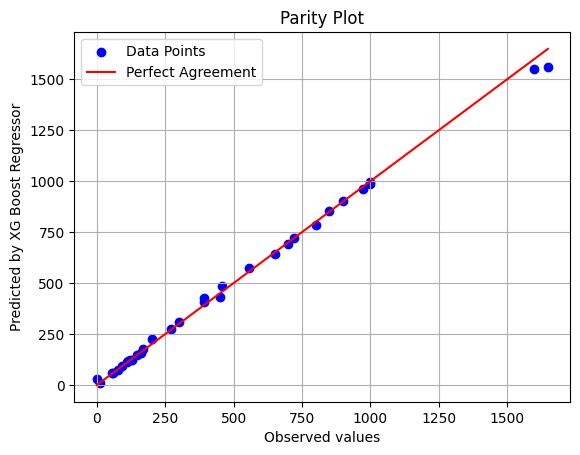

In [ ]:
import matplotlib.pyplot as plt
#Our best model is XG Boost
# observed values
observed = y_test

# Sample predicted values
predicted_XG = predict_test_XG

# Plotting the parity plot
plt.scatter(observed, predicted_XG, color='blue', label='Data Points')
plt.plot([min(observed), max(observed)], [min(observed), max(observed)], color='red', label='Perfect Agreement')
plt.xlabel('Observed values')
plt.ylabel('Predicted by XG Boost Regressor')
plt.title('Parity Plot')
plt.legend()
plt.grid(True)
plt.show()


*Comment the results of the previous program.*

# **`Task 2 “Regression Dashboard” (30 Scores)`**

Our group maked the Classification Dashboard because the highest matricule number is even.